# Stochastic

In the beginning of the modern era of finance, mainly in the 1970s and 1980s, the major goal of financial research was to come up with closed-form solutions, for, e.g., option prices given a specific financial model. The requirements have drastically changed in recent years in that not only is the correct valuation of single financial instuments important to participants in the financial markets, but also the consistent valuation of whole derivatives books. To come up with risk measures across a whole financial institution, like value-at-risk and credit valuation adjustments, one needs to take into account the whole book of the institution and all its counterparty.

## Random Numbers

In [1]:
# import packages

import math
import numpy as np
import numpy.random as npr      # import the random number generation subpackage from NumPy
from pylab import plt, mpl
import seaborn as sns

sns.set()
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

The `rand()` function returns random numbers from the open interval [0, 1) in the shape provided as a parameter to the function. The return pbject is an ndarray object.

In [2]:
# if one wants to generate from numbers from the interval [a, b)=[5, 10), one can transform the returned numbers from npr.rand()

npr.seed(100)           # Fixes the seed value for reproducibility
np.set_printoptions(precision=4) 

npr.rand(10)            # Uniformly distributed random numbers as one-dimensional ndarray object


array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [3]:
npr.rand(5, 5)      # Uniformly distributed random numbers as two-dimensional ndarray object

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [4]:
a = 5.          # lower limit
b = 10.         # and upper limit

In [5]:
npr.rand(10) * (b - a) + a      # for the transformation to another interval

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [6]:
npr.rand(5, 5) * (b - a) + a    # the same transformation for two dimensions

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

<b>Functions for single random number generation</b>
<table>
<tr>
    <th>Functions</th>
    <th>Parameters</th>
    <th>Returns/result</th>
</tr>
<tr>
    <td>rand </td>
    <td>d1, d1, ..., dn</td>
    <td>Random values in the given shape</td>
</tr>
<tr>
    <td>randn</td>
    <td>d0, d1, ..., dn</td>
    <td>A sample (or samples) from the standard normal distribution</td>
</tr>
<tr>
    <td>randint</td>
    <td>low[, high, size]</td>
    <td>Random integers from low (inclusive) to high (exlusive)</td>
</tr>
<tr>
    <td>random_integers</td>
    <td>low[, high, size]</td>
    <td>Random intergers between low and high inclusive</td>
</tr>
<tr>
    <td>random_sample</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>random</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>ranf</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>sample</td>
    <td>[size]</td>
    <td>Random floats in the half-open interval [0.0, 1.0)</td>
</tr>
<tr>
    <td>choice</td>
    <td>a[, size, replace, p]</td>
    <td>Random sample from a given 1D array</td>
</tr>
<tr>
    <td>bytes</td>
    <td>length</td>
    <td>Random bytes</td>
</tr>
</table>

Figrue below shows the results graphically for two continuous distributions and two discrete ones.

In [7]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)          # Uniformly distributed random numbers
rn2 = npr.randint(0, 10, sample_size)   # Random integers for a given interval
rn3 = npr.sample(size=sample_size)      # Unifromly distributed random numbers

a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)   # Randomly sampled values from a finite list object

Text(0.5, 1.0, 'choice')

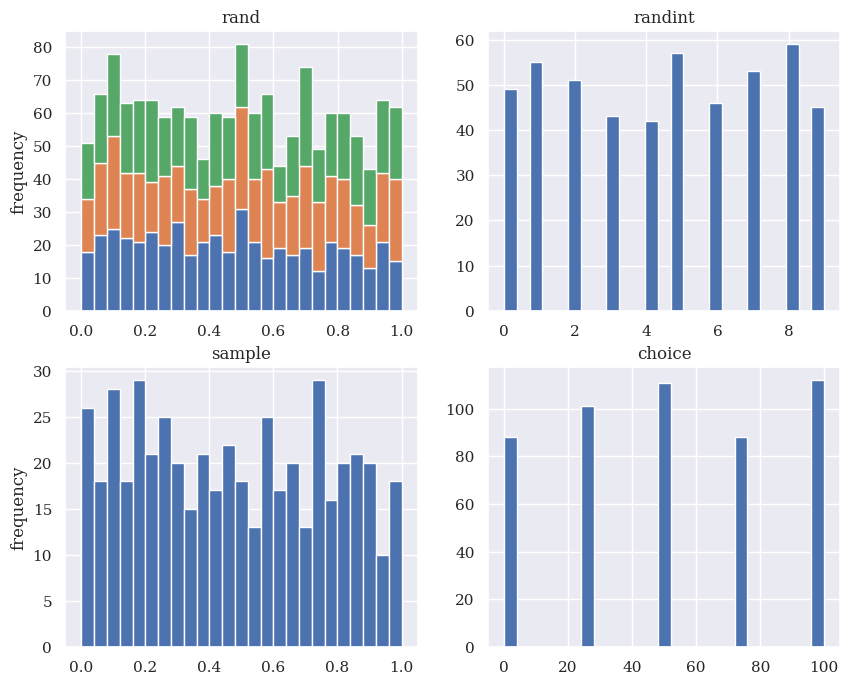

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

<b>Functions to generate random numbers according to different distribution laws</b>

<table>
<tr>
    <th>Functions</th>
    <th>Parameters</th>
    <th>Returns/result</th>
</tr>
<tr>
    <td>beta</td>
    <td>a, b[, size]</td>
    <td>Samples for a beta distribution over [0, 1]</td>
</tr>
<tr>
    <td>binomial</td>
    <td>n, p[, size]</td>
    <td>Sample from a binomial distribution</td>
</tr>
<tr>
    <td>chisquare</td>
    <td>df[, size]</td>
    <td>Samples from a chi-square distribution</td>
</tr>
<tr>
    <td>dirichlet</td>
    <td>alpha[, size]</td>
    <td>Samples from the Dirichlet distribution</td>
</tr>
<tr>
    <td>exponential</td>
    <td>[scale, size]</td>
    <td>Samples from the exponential distribution</td>
</tr>
<tr>
    <td>f</td>
    <td>dfnum, dfden[, size]</td>
    <td>Samples from an F distribution</td>
</tr>
<tr>
    <td>gamma</td>
    <td>shape[, scale, size]</td>
    <td>Samples from a gamma distribution</td>
</tr>
<tr>
    <td>geometric</td>
    <td>p[, size]</td>
    <td>Samples form the geometric distribution</td>
</tr>
<tr>
    <td>gumbel</td>
    <td>[loc, sacle, size]</td>
    <td>Samples from a Gumbel distribution</td>
</tr>
<tr>
    <td>hypergeometric</td>
    <td>ngood, nbad, nsample[, size]</td>
    <td>Samples from a hyper geometric distribution</td>
</tr>
<tr>
    <td>laplace</td>
    <td>[loc, scale, size]</td>
    <td>Samples from the Laplace or double exponential distribution</td>
</tr>
<tr>
    <td>logistic</td>
    <td>[loc, scale, size]</td>
    <td>Samples from a logistic distribution</td>
</tr>
<tr>
    <td>lognormal</td>
    <td>[mean, sigma, size]</td>
    <td>Sample from a log-normal distribution</td>
</tr>
<tr>
    <td>logseries</td>
    <td>p[, size]</td>
    <td>Sample from a logarithmic series distribution</td>
</tr>
<tr>
    <td>multinomian</td>
    <td>n, pvals[, size]</td>
    <td>Samples from a multinomial distribution</td>
</tr>
<tr>
    <td>multivariate_normal</td>
    <td>mean, cov[, size]</td>
    <td>Samples from a multivariate normal distribution</td>
</tr>
<tr>
    <td>negative_binomial</td>
    <td>n, p[, size]</td>
    <td>Samples from a negative binomial distribution</td>
</tr>
<tr>
    <td>noncentral_chisquare</td>
    <td>df, nonc[, size]</td>
    <td>Samples from a noncentral chi-square distribution</td>
</tr>
<tr>
    <td>noncentral_f</td>
    <td>dfnum, dfden,</td>
    <td>Samples from the nonceltral F distribution</td>
</tr>
<tr>
    <td>normal</td>
    <td>[loc, scale, size]</td>
    <td>Samples from a normal (Gaussian) distribution</td>
</tr>
<tr>
    <td>pareto</td>
    <td>a[, size]</td>
    <td>Samples from a Pareto II or Lomax distribution with the specified shape
</tr>
    <td>poisson</td>
    <td>a[, size]</td>
    <td>Samples from a Poisson distribution</td>
<tr>
    <td>power</td>
    <td>a[, size]</td>
    <td>Sample in [0, 1] from a powewr distribution with positive exponent a - 1</td>
</tr>
<tr>
    <td>rayleigh</td>
    <td>[scale, size]</td>
    <td>Samples from a Rayleigh distribution</td>
</tr>
<tr>
    <td>standard_cauchy</td>
    <td>[size]</td>
    <td>Samples from standard Cauchy distribution with mode = 0</td>
</tr>
<tr>
    <td>standard_exponential</td>
    <td>[size]</td>
    <td>Samples from the standard exponential distribution</td>
</tr>
<tr>
    <td>standard_gamma</td>
    <td>shape[, size]</td>
    <td>Samples from a standard gamma distribution</td>
</tr>
<tr>
    <td>standard_normal</td>
    <td>[size]</td>
    <td>Samples from a standard normal distribution (mean = 0, stdev=1)</td>
</tr>
<tr>
    <td>standrd_t</td>
    <td>df[, size]</td>
    <td>Samples from a Student's t distribution with df degrees of freedom</td>
</tr>
<tr>
    <td>triangular</td>
    <td>left, mode, right[, size]</td>
    <td>Samples from the triangular distribution over the interval [left, right]</td>
</tr>
<tr>
    <td>uniform</td>
    <td>[low, high, size]</td>
    <td>Samples from a uniform distribution</td>
</tr>
<tr>
    <td>vomises</td>
    <td>mu, kappap[, size]</td>
    <td>Samples from a von Mises distribution</td>
</tr>
<tr>
    <td>wald</td>
    <td>mean, scale[, size]</td>
    <td>Samples froem a Wald, or inverse Gaussian, distribution</td>
</tr>
<tr>
    <td>weibull</td>
    <td>a[, size]</td>
    <td>Samples from a Weibull distribution</td>
</tr>
<tr>
    <td>zipf</td>
    <td>a[, size]</td>
    <td>Samples from a Zipf distribution</td>
</tr>
</table>

Although there is much cirticism aroung the use of (standard) normal distributions in finance, they are an indispensalbe tool and still the most widely used type of distribution.

Figure below visualizes rnadom draws from the following distributions:

- Standard normal with mean of 0 and standard deviation of 1

- Normal with mean of 100 and standard deviation of 20

- Chi square with 0.5 degree of freedom

- Poisson with lambda of 1

Three of them are continuous distribution but Poisson is discrete one. The Poisson distribution is used to simulate the arrival of (rare) external events, like a jump in the price of an instrument or an exogenic shock.

Text(0.5, 1.0, 'Poisson')

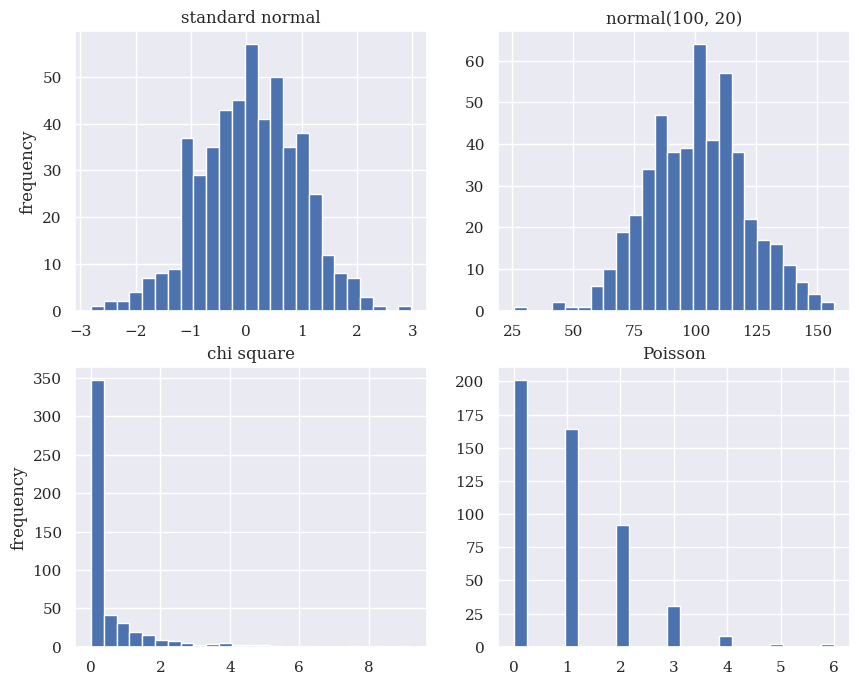

In [9]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)          # standard normally distributed random numbers
rn2 = npr.normal(100, 20, sample_size)          # Normally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size)   # Chi-square disttributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size)    # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')

ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')

ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')

ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')

## Simulation

Monte Carlo simulation (MCS) is among the most important numerical technikques in finance.

### Random Variables

Consider the Black-Scholes-Merton setup for otpion pricing. The level of a stock index $S_T$ at a future date $T$ given a level $S_0$ as of today is given accoring to equation below.

<b>Simulating future index level in Black-Scholes-Merton setup</b>
$$S_T=S_0\exp{\left((r-\frac{1}{2}\sigma^2)T+\sigma\sqrt{T}z\right)}$$

$S_T$ : index level at date $T$

$r$ : constant riskless short rate

$\sigma$ : constant volatility (= standard deviation of returens) os $S$

$z$ : Standard normally distributed random variable